# Lazada Product Exploration

### Audhi Aprilliant

In [143]:
import pandas as pd                   # Dataframe manipulation
import numpy as np                    # Mathematics operation
import matplotlib.pyplot as plt       # Data visualization
import seaborn as sns
from wordcloud import WordCloud       # Wordclouds
# N- Grams
from sklearn.feature_extraction.text import CountVectorizer

## 2 Load the Data

In [3]:
data_lazada_viz = pd.read_csv('Datasets/interim/1 Lazada-product after Preprocessing.csv')

In [4]:
print('Dimension of Lazada data:\n{}'.format(data_lazada_viz.shape[0]),
      'rows and {}'.format(data_lazada_viz.shape[1]),'columns')
data_lazada_viz.head()

Dimension of Lazada data:
6735 rows and 2 columns


,title,category
0,lazada exclusive infinix smart gb dual camera ...,handphone
1,lazada special edition infinix hot gb triple c...,handphone
2,realme c hp murah mah battery octa core hio p ...,handphone
3,vivo y hp gb gb gb all screen inch mp hio p tr...,handphone
4,realme i hp gb gb gb gb qualcomm snapdragon ai...,handphone


In [5]:
print(data_lazada_viz['category'].value_counts())

makeup       2713
pakaian      2380
handphone    1642
Name: category, dtype: int64


## 3 Wordclouds for Each Categories

In [78]:
# Subsetting
data_makeup = data_lazada_viz.loc[data_lazada_viz['category'] == 'makeup',:]
data_pakaian = data_lazada_viz.loc[data_lazada_viz['category'] == 'pakaian',:]
data_handphone = data_lazada_viz.loc[data_lazada_viz['category'] == 'handphone',:]

### 1 MakeUp

In [79]:
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=40, 
                      random_state=42,
                      min_font_size = 10).generate(str(data_makeup['title']))

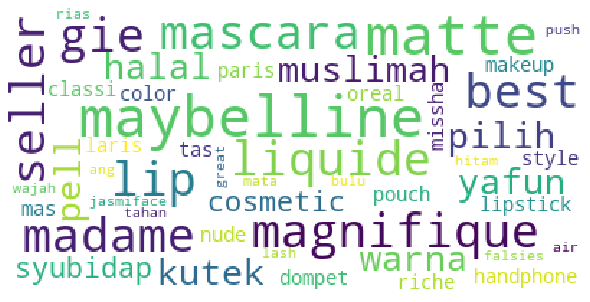

In [82]:
fig = plt.figure(figsize=(8,8),facecolor=None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('Reports/figures/Worcloud MakeUp.png',dpi=500)

### 2 Pakaian

In [83]:
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=40, 
                      random_state=42,
                      min_font_size = 10).generate(str(data_pakaian['title']))

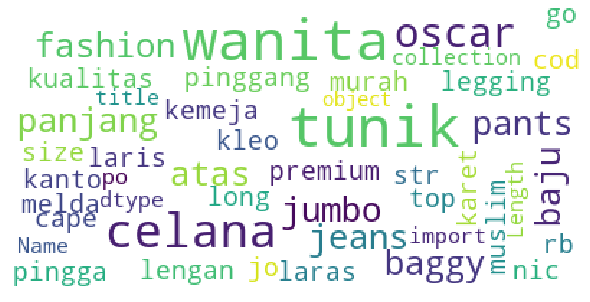

In [84]:
fig = plt.figure(figsize=(8,8),facecolor=None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('Reports/figures/Worcloud Pakaian.png',dpi=1000)

### Handphone

In [85]:
wordcloud = WordCloud(background_color='white',
                      max_words=500,
                      max_font_size=40, 
                      random_state=42,
                      min_font_size = 10).generate(str(data_handphone['title']))

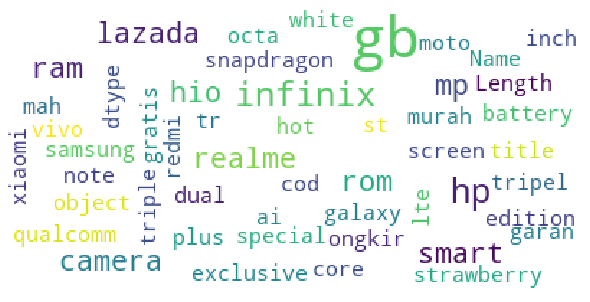

In [86]:
fig = plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('Reports/figures/Worcloud Handphone.png',dpi=1000)

## 4 Frequent Word in Each Categories

In [48]:
# Counting term frequency each categories
term_freq_makeup = pd.Series(' '.join(data_makeup['title']).split(' ')).value_counts()
term_freq_pakaian = pd.Series(' '.join(data_pakaian['title']).split(' ')).value_counts()
term_freq_handphone = pd.Series(' '.join(data_handphone['title']).split(' ')).value_counts()
# Convert to dataframe
term_freq_makeup = pd.DataFrame(term_freq_makeup)
term_freq_pakaian = pd.DataFrame(term_freq_pakaian)
term_freq_handphone = pd.DataFrame(term_freq_handphone)
# Column's names
term_freq_makeup.reset_index(level=0,inplace=True)
term_freq_pakaian.reset_index(level=0,inplace=True)
term_freq_handphone.reset_index(level=0,inplace=True)
term_freq_makeup.columns = ['Term','Freq']
term_freq_pakaian.columns = ['Term','Freq']
term_freq_handphone.columns = ['Term','Freq']

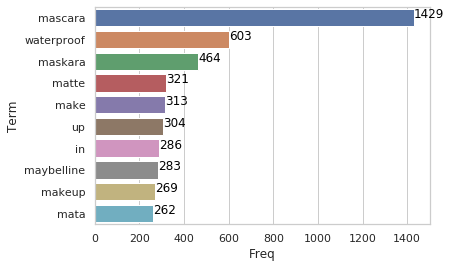

In [65]:
freq_term_makeup = term_freq_makeup[:10]
sns.set(style='whitegrid')
barplot = sns.barplot(x='Freq',y='Term',data=freq_term_makeup)
for index,row in freq_term_makeup.iterrows():
    barplot.text(x=row.Freq,y=row.name,s=row.Freq,color='black',ha='left')
plt.show()

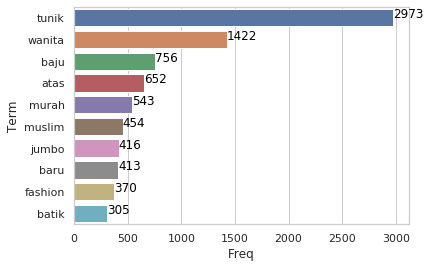

In [66]:
freq_term_pakaian = term_freq_pakaian[:10]
sns.set(style='whitegrid')
barplot = sns.barplot(x='Freq',y='Term',data=freq_term_pakaian)
for index,row in freq_term_pakaian.iterrows():
    barplot.text(x=row.Freq,y=row.name,s=row.Freq,color='black',ha='left')
plt.show()

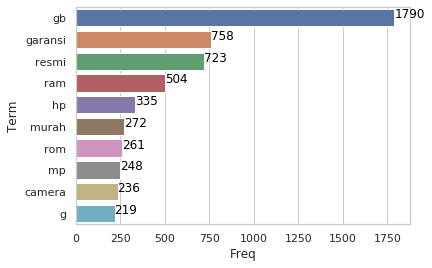

In [67]:
freq_term_handphone = term_freq_handphone[:10]
sns.set(style='whitegrid')
barplot = sns.barplot(x='Freq',y='Term',data=freq_term_handphone)
for index,row in freq_term_handphone.iterrows():
    barplot.text(x=row.Freq,y=row.name,s=row.Freq,color='black',ha='left')
plt.show()

## 5 N-Grams

In [177]:
# Determine n-grams
word_vectorizer = CountVectorizer(ngram_range=(1,2),analyzer='word')

### 5.1 MakeUp

In [217]:
sparse_matrix = word_vectorizer.fit_transform(data_handphone['title'])
frequencies = sum(sparse_matrix).toarray()[0]
# Dataframe of N-grams
ngrams_makeup = pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(),columns=['frequency'])
ngrams_makeup.reset_index(level=0,inplace=True)

In [218]:
# N-Grams
ngrams = []
for i in range(ngrams_makeup.shape[0]):
    ngrams.append(len(str.split(ngrams_makeup.iloc[i]['index'])))
ngrams = pd.Series(ngrams,name='NGrams')

In [219]:
# Merge dataframe
ngrams_makeup = pd.concat([ngrams_makeup,ngrams],axis=1)
ngrams_makeup = ngrams_makeup.sort_values(by='frequency',ascending=False)

In [220]:
ngrams_makeup[ngrams_makeup.NGrams == 1].head()

,index,frequency,NGrams
1257,gb,1790,1
1234,garansi,758,1
3499,resmi,723,1
3378,ram,504,1
1663,hp,335,1


In [221]:
ngrams_makeup[ngrams_makeup.NGrams == 2].head()

,index,frequency,NGrams
1247,garansi resmi,647,2
3381,ram gb,453,2
1296,gb gb,420,2
1295,gb garansi,248,2
3596,rom gb,234,2


### 5.2 Pakaian

In [206]:
sparse_matrix = word_vectorizer.fit_transform(data_pakaian['title'])
frequencies = sum(sparse_matrix).toarray()[0]
# Dataframe of N-grams
ngrams_pakaian = pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(),columns=['frequency'])
ngrams_pakaian.reset_index(level=0,inplace=True)

In [207]:
# N-Grams
ngrams = []
for i in range(ngrams_pakaian.shape[0]):
    ngrams.append(len(str.split(ngrams_pakaian.iloc[i]['index'])))
ngrams = pd.Series(ngrams,name='NGrams')

In [208]:
# Merge dataframe
ngrams_pakaian = pd.concat([ngrams_pakaian,ngrams],axis=1)
ngrams_pakaian = ngrams_pakaian.sort_values(by='frequency',ascending=False)

In [210]:
ngrams_pakaian[ngrams_pakaian.NGrams == 1].head()

,index,frequency,NGrams
9000,tunik,2973,1
9817,wanita,1422,1
637,baju,756,1
390,atas,652,1
5806,murah,543,1


In [211]:
ngrams_pakaian[ngrams_pakaian.NGrams == 2].head()

,index,frequency,NGrams
9535,tunik wanita,325,2
455,atas wanita,249,2
10029,wanita tunik,192,2
9243,tunik jumbo,153,2
453,atas tunik,131,2


### 5.3 Handphone

In [212]:
sparse_matrix = word_vectorizer.fit_transform(data_handphone['title'])
frequencies = sum(sparse_matrix).toarray()[0]
# Dataframe of N-grams
ngrams_handphone = pd.DataFrame(frequencies,index=word_vectorizer.get_feature_names(),columns=['frequency'])
ngrams_handphone.reset_index(level=0,inplace=True)

In [213]:
# N-Grams
ngrams = []
for i in range(ngrams_handphone.shape[0]):
    ngrams.append(len(str.split(ngrams_handphone.iloc[i]['index'])))
ngrams = pd.Series(ngrams,name='NGrams')

In [214]:
# Merge dataframe
ngrams_handphone = pd.concat([ngrams_handphone,ngrams],axis=1)
ngrams_handphone = ngrams_handphone.sort_values(by='frequency',ascending=False)

In [215]:
ngrams_handphone[ngrams_handphone.NGrams == 1].head()

,index,frequency,NGrams
1257,gb,1790,1
1234,garansi,758,1
3499,resmi,723,1
3378,ram,504,1
1663,hp,335,1


In [216]:
ngrams_handphone[ngrams_handphone.NGrams == 2].head()

,index,frequency,NGrams
1247,garansi resmi,647,2
3381,ram gb,453,2
1296,gb gb,420,2
1295,gb garansi,248,2
3596,rom gb,234,2
